## <u>EJERCICIO 1</u>
### **CLASIFICACION CON KMeans y Affinity Propagation**

### PASO 0 - Importo las librerias

In [16]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

### PASO 1 - Cargo el dataframe y lo normalizo

In [17]:
dataset = load_wine()

# Divido los datos de entrada de los de salida (labels).
x_originales = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y_originales = dataset.target

In [18]:
# Estadisticas generales
estadisticas = x_originales.describe().transpose()

# Normalizo los datos con la media y la desviacion estandar
def normalizar(valor):
	return (valor - estadisticas["mean"]) / estadisticas["std"]

x_normal = normalizar(x_originales)
x_normal.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


### PASO 2 - Aplico el algoritmo PCA para reducir la dimensionalidad a 2

In [19]:
# Reducion de la data a dos dimensiones

reduccion_pca = PCA(n_components=2)
x_transformada = reduccion_pca.fit_transform(x_normal)

print(f"Data normalizada: {x_normal.shape}")
print(f"Data reducida: {x_transformada.shape}")

sumatoria = np.sum(reduccion_pca.explained_variance_ratio_)
print(f"Porcentaje de vararianza explicada: {sumatoria}")

Data normalizada: (178, 13)
Data reducida: (178, 2)
Porcentaje de vararianza explicada: 0.5540633835693525


Text(0, 0.5, 'Componente PCA-2')

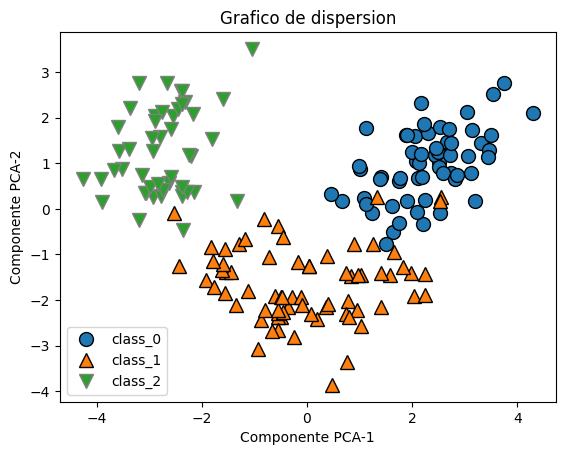

In [20]:
mglearn.discrete_scatter(x_transformada[:,0], x_transformada[:,1], y_originales)
plt.legend(dataset.target_names, loc="best")
plt.title("Grafico de dispersion")
plt.xlabel("Componente PCA-1")
plt.ylabel("Componente PCA-2")

### PASO 3 - Divido las data en entrenamiento y test

In [21]:
# Division de los datos normalizados

porc_test = 0.25
seed = 30

x_entrenar, x_test, y_entrenar, y_test = train_test_split(x_transformada, y_originales, test_size=porc_test, random_state=seed, shuffle=True)


print(f"Entrenamiento normalizado y redimensionado {x_entrenar.shape}")
print(f"Testeo normalizado y redimensionado {x_test.shape}")

Entrenamiento normalizado y redimensionado (133, 2)
Testeo normalizado y redimensionado (45, 2)


### PASO 4 - Aplicando del algoritmo KMeans con valores de K de 2, 3, 4 y 5

In [22]:
def modelo_kmeans(k, entrena, testeo_x, testeo_y):
	# Instanciado y entrenamiento del algoritmo
	kmeans = KMeans(n_clusters=k, max_iter=2000, random_state=9)
	kmeans.fit(entrena)

	# Generacion de la prediccion
	y_predecida = kmeans.predict(testeo_x)

	# Evaluacion del desempeÑo
	puntuacion = metrics.adjusted_rand_score(testeo_y, y_predecida)
	print(f"Puntuacion con {k} clusters: {puntuacion}")
	return puntuacion

In [23]:
scores = []
for k in range(2, 6):
	puntuacion = modelo_kmeans(k, x_entrenar, x_test, y_test)
	scores.append(puntuacion)

Puntuacion con 2 clusters: 0.3095232335937689
Puntuacion con 3 clusters: 0.925393584807421
Puntuacion con 4 clusters: 0.6922665432937672
Puntuacion con 5 clusters: 0.6136292451563828


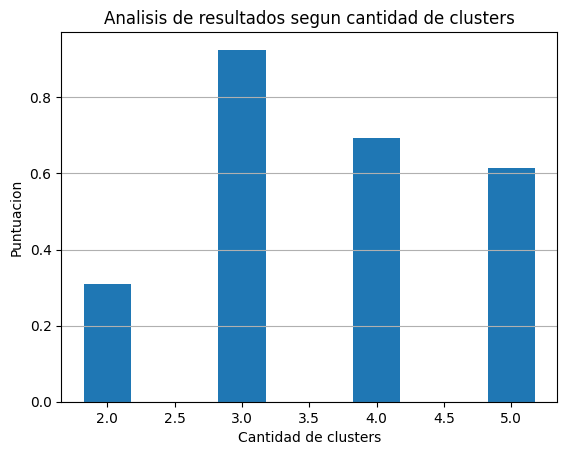

In [24]:
plt.bar([2, 3, 4, 5], scores, width=0.35)
plt.title("Analisis de resultados segun cantidad de clusters")
plt.xlabel("Cantidad de clusters")
plt.ylabel("Puntuacion")
plt.grid(axis="y")

### PASO 5 - Aplicando el algoritmo Propagacion por Afinidad

In [25]:
afinidad = AffinityPropagation(preference=-80, damping=0.9, random_state=None)
app = afinidad.fit(x_transformada)

In [26]:
# Estimacion de clusters para el modelo
cluster_centers_indices = app.cluster_centers_indices_
labels = app.labels_
n_clusters = len(cluster_centers_indices)
print(f"Numero de clusters estimados: {n_clusters}")

Numero de clusters estimados: 3


In [27]:
# Calculo de aciertos entre labels de testeo y predichos
app.fit(x_entrenar)
y_predecida_af=app.predict(x_test)
score=metrics.adjusted_rand_score(y_test, y_predecida_af)
print(f"Porcentaje de aciertos: {score}")

Porcentaje de aciertos: 0.925393584807421


### PASO 6 - Conclusiones
**- Aplicacion del algoritmo PCA**
Cuando aplico el algoritmo para la reduccion de los datos de entrada a solo 2, partiendo de 13 entradas, me llama la atencion el valor del porcentaje de la varianza explicada al rededor de un 55%. Ya que, al hacer mas adelante las estimaciones con los modelos no se percibe esa perdida de informacion en el rendimiento. Esto siempre manejandose dentro de los resultados con 3 clusters.
En el grafico de dispersion se puede ver que la reduccion a dos componentes ha sido efectiva y muestra bien la separacion en tres clases de vinos.

**- KMeans**
Al hacer las pruebas en este modelo con distintos valores de K. Puedo observar que cuando salgo del valor, que ya se conocia de 3 clases, baja considerablemente la puntuacion de cada modelo. Lo cual me lleva a tener en cuenta que para el uso de KMeans se deben probar varios valores de clusters para poder entrenar con el mas optimo.

**- Propagacion por Afinidad**
Con este algorimo, luego de hacer varias pruebas con los parametros de preference y damping. Los valores de mayores aciertos los pude lograr cuando el modelo estimo el numero de clusters en 3, ya que hubo ejecuciones con 2 y 4 clusters que daban un porcentaje de aciertos muy por debajo del 80%

En ambos algoritmos hay que hacer varias pruebas con distintos parametros para poder considerar que el modelo este correctamente entrenado. Tomando el resultado de KMeans de 3 clusters y el de Propagacion por afinidad, noto que ambos modelos me estan dando un porcentaje de aciertos de 92.54%